# Домашняя работа 9. Линейная регрессия, Логистическая регрессия
## Задача 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],<br>
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 

Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.



In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [3]:
r = np.corrcoef(zp, ks) [1,0]
r

0.8874900920739162

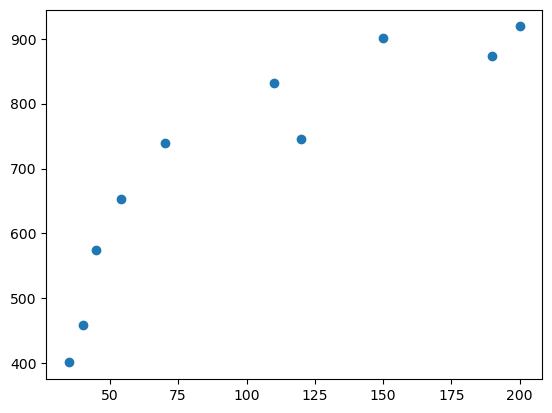

In [4]:
plt.scatter(zp, ks)

Коэффициент корреляции и график показывают высокую степень корреляции между переменными.
#### Построим линейную регрессию

In [5]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [6]:
model = LinearRegression()
zp_r = zp.reshape(-1, 1)
zp_r

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [7]:
regres = model.fit(zp_r, ks)
print(f"Ответ: коэффициенты регрессии: {regres.intercept_, regres.coef_[0]}")

Ответ: коэффициенты регрессии: (444.17735732435955, 2.6205388824027653)


In [8]:
ks_fc = model.predict(zp_r)
ks_fc

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [9]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.DataFrame({'З/п': zp, 'Реальный КР': ks, 'Предск. КР': (ks_fc), 'Разница': (ks_fc - ks), 'Разница, %': (100*(ks_fc - ks)/ks)})

,З/п,Реальный КР,Предск. КР,Разница,"Разница, %"
0,35,401,535.90,134.90,33.64
1,45,574,562.10,-11.90,-2.07
2,190,874,942.08,68.08,7.79
3,200,919,968.29,49.29,5.36
4,40,459,549.00,90.00,19.61
5,70,739,627.62,-111.38,-15.07
6,54,653,585.69,-67.31,-10.31
7,150,902,837.26,-64.74,-7.18
8,120,746,758.64,12.64,1.69
9,110,832,732.44,-99.56,-11.97


Text(0.5, 1.0, 'y_fc = 444 + 3*x')

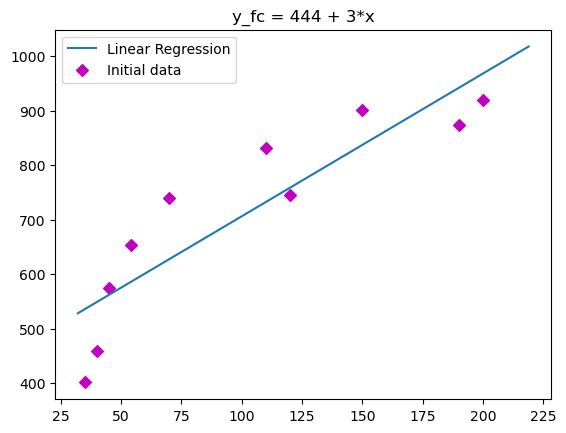

In [10]:
x_axis = np.arange(round(min(zp)*0.9), round(max(zp)*1.1, 1))
y_axis = model.predict(x_axis.reshape(-1, 1))
line_r = plt.plot(x_axis, y_axis, label='Linear Regression')

plt.scatter(zp, ks, marker='D', c='m', label='Initial data')
plt.legend()
plt.title(f'y_fc = {round(regres.intercept_)} + {round(regres.coef_[0])}*x')

#### Используем матричный метод:

In [11]:
ks_r = ks.reshape(-1, 1)
ks_r

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [12]:
zp_h = np.hstack([np.ones((len(zp), 1)), zp_r])
zp_h

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [13]:
B = np.dot(np.linalg.inv(np.dot(zp_h.T, zp_h)), zp_h.T @ ks_r)
B

array([[444.17735732],
       [  2.62053888]])

Коэффициенты совпали. Осталось сделать проверки.
#### Проверка №1. Независимость остатков

С этой целью строится график зависимости остатков от теоретических значений результативного признака.

In [14]:
resid = ks - ks_fc
resid

array([-134.89621821,   11.89839297,  -68.07974498,  -49.2851338 ,
        -89.99891262,  111.38492091,   67.31354303,   64.74181032,
        -12.64202321,   99.56336561])

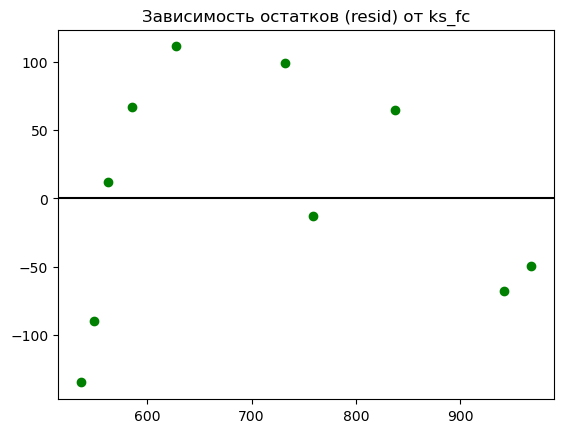

In [15]:
plt.scatter(ks_fc, resid, marker='o', c='g')

plt.title(f'Зависимость остатков (resid) от ks_fc')
plt.axhline(y=0, color='k')

Так как остатки распределены примерно одинаково в плюс и в минус в зависимости от расчетной величины кредитного скоринга, можно сделать вывод, что остатки независимы.
#### Проверка №2. Нормальность остатков

In [16]:
stats.shapiro(resid)

ShapiroResult(statistic=0.9479533433914185, pvalue=0.6443524360656738)

Так как p-value Теста Шапиро-Уилка больше, чем 0.05, то можно с большой долей уверенности предполагать, что остатки имеют нормальное распределение.
#### Проверка №3. Значимость полученной модели (критерий Фишера)

In [17]:
n = zp.shape[0]
m = 1
k1 = m
k2 = n - m - 1

k1, k2

(1, 8)

In [18]:
alpha = 0.05
t = stats.f.ppf(1 - alpha, k1, k2)
t # находим t-статистику

5.317655071578714

In [19]:
R2 = r**2
F = (R2 / k1) / ((1 - R2) / k2)
F

29.671640859664432

Нулевая гипотеза (о том, что коэффициенты не имеют значения, или иными словами $R^2 = 0$) отвергается. Значит, найденные коэффициенты имеют значение.

Так как статистика ($t = 5.32$) меньше, чем критическое значение ($F = 29.67$)

## Задача 2
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [29]:
def mse2(B_1, y, x, n):
    return np.sum((B_1 * x - y)**2)/n

In [34]:
alpha = 1e-6
B1 = 1
n = zp.shape[0]

In [35]:
for _ in range(10000):
    B1 -= alpha * (2/n) * np.sum((B1 * zp - ks) * zp)
print('B1 = {}'.format(B1))

B1 = 5.889820420132673


In [36]:
B1 = 1
for i in range(5001):
    B1 -= alpha * (2/n) * np.sum ((B1* zp - ks) * zp)
    if i % 500 == 0:
        print(f'Iteration = {i}, B1 = {B1}, mse = {mse2(B1, ks, zp, n)}')

Iteration = 0, B1 = 1.1347302, mse = 368017.9491755833
Iteration = 500, B1 = 5.8898163455368975, mse = 56516.85841594815
Iteration = 1000, B1 = 5.8898204201291975, mse = 56516.8584157194
Iteration = 1500, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration = 2000, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration = 2500, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration = 3000, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration = 3500, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration = 4000, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration = 4500, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration = 5000, B1 = 5.889820420132673, mse = 56516.85841571943


## Задача 3

(Дополнительно). Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [45]:
def mse3(B_0, B_1, y, x, n):
    return np.sum((B_0 + B_1 * x - y)**2) / n

In [66]:
alpha = 0.00001
alpha2 = 0.01
B1 = 1
B0 = 1000
n = zp.shape[0]
n

10

In [70]:
for i in range(10001):
    temp = B1
    B1 -= alpha * (2/n) * np.sum((B0 + B1 * zp - ks) * zp)
    B0 -= alpha2 * (2/n) * np.sum(B0 + temp * zp - ks)
    if i % 500 == 0:
        print(f'Iteration = {i}, B0 = {B0}, B1 = {B1}, mse = {mse3(B0, B1, ks, zp, n)}')
print('B0 = {}'.format(B0), 'B1 = {}'.format(B1), sep='\n')

Iteration = 0, B0 = 444.17735732436546, B1 = 2.6205388824027214, mse = 6470.41420117666
Iteration = 500, B0 = 444.17735732436546, B1 = 2.6205388824027214, mse = 6470.41420117666
Iteration = 1000, B0 = 444.17735732436546, B1 = 2.6205388824027214, mse = 6470.41420117666
Iteration = 1500, B0 = 444.17735732436546, B1 = 2.6205388824027214, mse = 6470.41420117666
Iteration = 2000, B0 = 444.17735732436546, B1 = 2.6205388824027214, mse = 6470.41420117666
Iteration = 2500, B0 = 444.17735732436546, B1 = 2.6205388824027214, mse = 6470.41420117666
Iteration = 3000, B0 = 444.17735732436546, B1 = 2.6205388824027214, mse = 6470.41420117666
Iteration = 3500, B0 = 444.17735732436546, B1 = 2.6205388824027214, mse = 6470.41420117666
Iteration = 4000, B0 = 444.17735732436546, B1 = 2.6205388824027214, mse = 6470.41420117666
Iteration = 4500, B0 = 444.17735732436546, B1 = 2.6205388824027214, mse = 6470.41420117666
Iteration = 5000, B0 = 444.17735732436546, B1 = 2.6205388824027214, mse = 6470.41420117666
Ite